# Optimización de Parametros.

# Entrenar el modelo con keras y tensorflow

1. **Cargue las librerias que necesite:numpy, matplotlib.pyplot,etc.**


2. **Para cargar las librerias utilice  import seguido del nombre de la libreria y de un alias (as).Ejemplo import pandas as pd**


3.   **Ejecute de forma secuencial de arriba hacia abajo las celdas de código dando click al boton play o ctrl+enter**
   
4. **Al ejecutar la celda debe marcar un check en color verde al lado izquierdo de la celda de código y en el menu de google colab en la parte superior derecha, se debe activar Ram y Disco con un check verde.**


5. **El simbolo # es para comentarios dentro del código.**

6. **Para subir un archivo a google colab se puede hacer click en la parte izquierda, donde aparace una carpeta y le da click al simbolo de una hoja con la flecha hacia arriba cargar archivo al almacenamiento de sesión.** 

Mnist un conjunto que esta dentro de keras.

Conjunto de números escritos a mano digitalizados.

Los números son:0,1,2,3,4,5,6,7,8,9

En total son 10 números.

Estos números estan en un dataset en keras.

Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total por cada imágen). Se utiliza una división  del conjunto de datos para evaluar y comparar modelos, en la que se utilizan 60.000 imágenes para formar un modelo(training) y un conjunto separado de 10.000 imágenes para probarlo(test)

**Para guardar el modelo se instala la libreria h5py**

In [183]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Observemos las imágenes de los numeros en escala de grises**

 #El dataset esta compuesto por 4 particiones
 #Entrenamiento y prueba para X y para Y (60000 y 10000) 
1.   x_train:entrada de la red neuronal(entrenar la red)
2.   y_train:salida de la red neuronal(entrenar la red)
3. x_test:entrada de prueba del red neuronal(probrando la red neuronal)
4. y_test:salida de prueba de la red neuronal(probrando la red neuronal)
5. mnist.load_data():Carga los números desde Keras al Notebook



Para graficar los números.

* Se puede escribir subplot(224) ó subplot(2,2,4)
* Especifica num_filas, num_columnas, numplot



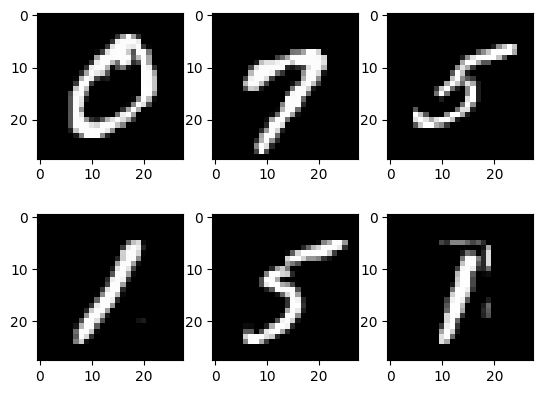

In [184]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# plot 6 imagenes en escala de grises
plt.subplot(2,3,1)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(2,3,2)
plt.imshow(x_train[15], cmap=plt.get_cmap('gray'))
plt.subplot(2,3,3)
plt.imshow(x_train[35], cmap=plt.get_cmap('gray'))
plt.subplot(2,3,4)
plt.imshow(x_train[5675], cmap=plt.get_cmap('gray'))
plt.subplot(2,3,5)
plt.imshow(x_train[653], cmap=plt.get_cmap('gray'))
plt.subplot(2,3,6)
plt.imshow(x_train[67], cmap=plt.get_cmap('gray'))
# Muestra el gráfico de los 4 numeros
plt.show()

# Creación del modelo

In [185]:
import numpy as np
from keras.datasets import mnist
#Utils para poder usar categorización
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
 

## Carga de dataset

In [186]:
# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)(salida)


x_shape: (60000, 28, 28)
y_shape: (60000,)


# Normalización de datos - Imágenes

In [187]:

#normalizar imagenes (60000,28,28) => (6000,784)(salida)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0 #(se divide por 255 pixeles,para tener numeros entre 0 y 1)
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
#visualizar tamaño de las salidas
print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (60000, 784)
x_test (10000, 784)


# Categorización de variable objetivo y

In [188]:
 #Cambiar a un formato por categorias (10 debibo a los numeros 0,1,2..9)
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)
 


#Definición del modelo

In [189]:
#Se crea el modelo .Sequential, se crea una capa densa con 784 entradas y 10 neuronas
# Se determina el modo en que los valores de los sesgos (BIAS) serán inicializados aleatoriamente al inicio del entrenamiento
# la activacion softmax es para dar la probabilidad del numero 
model = Sequential([
        Dense(units=10,input_dim=784,bias_initializer='ones',activation='softmax')
    ])

#Ver características del modelo
model.summary()

 


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Primer hiperparámetro: learning Rate

El learning rate es el porcentaje de cambio con el que se actualizan los pesos en cada iteración, en otras palabras, cada que se realiza una iteración en el proceso de entrenamiento se deben actualizar los pesos de la entrada para poder dar cada vez una mejor aproximación.
Este trabajo, de calcular el error de los pesos se puede hacer con el algoritmo SGD o con ADAM , y en cada iteración calcula un nuevo valor para los pesos. Así que el learning rate nos dice que tanto actualizamos los pesos en cada iteración, en un rango de 0 a 1.
Ahora el hecho de poner un valor muy carcano a 1 podria cometer errores y no obtendriamos un modelo de predicción adecuado, pero si ponemos un valor muy pequeño este entrenamiento podria ser demasiado lento para acercarnos a una predicción aceptable.

## Compilar modelo

In [190]:
#Se compila la red, se define optimizador, función de pérdida y precisión de cálculo durante el entrenamiento
# Definir optimizador, función de pérdida, precisión de cálculo durante el entrenamiento
sgd = SGD(learning_rate=0.2)
model.compile(
    optimizer = sgd,
    loss = 'mse',# funcion de perdida mse(error cuadratico media)
    metrics=['accuracy'],# metrica, efectividad del modelo
)
 


# Entrenamiento y evaluación del modelo

* Segundo hiperparámetro: Batch Size (tamaño del lote)
Se especifica el tamaño del lote (# de filas del dataset que se copnsiderarán antes de que el modelo actualice los pesos)
* Tercer hiperparámetro: Epochs
El proceso de entrenamiento se implementará mediante la ejecuçión de un # determinado de epocas a través del dataset.En cada ciclo todos los datos de entrenamiento pasan por la red neuronal para que esta aprenda sobre ellos, si existen 5 ciclos y 60000 datos, en cada ciclo los 60000 datos pasarán por la red neuronal

In [191]:
#  Entrenamiento del modelo
# batch_size= Es el numero de datos que tiene cada iteración 
#de un ciclo (epoch), esto es util porqué la red 
#neuronal actualiza los parametros W (pesos)

# epochs=Este es el número de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation. 
#En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal
# para que esta aprenda sobre ellos, si existen 10 ciclos y 1000 datos, # en cada ciclo los 1000 datos pasaran por la red neuronal


model.fit(x_train,y_train,batch_size=64,epochs=10)
 



Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0505 - accuracy: 0.6854
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0256 - accuracy: 0.8588
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0213 - accuracy: 0.8770
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0193 - accuracy: 0.8866
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0181 - accuracy: 0.8918
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0173 - accuracy: 0.8953
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0166 - accuracy: 0.8988
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0161 - accuracy: 0.9016
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0158 - accuracy: 0.9036
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0154 - accuracy: 0.9050

# 6.Evaluar el modelo con loss y accuraccy loss

In [192]:
#  Evaluación del modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)
 
print('\ntest loss',loss)
print('accuracy',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9113

test loss 0.014419381506741047
accuracy 0.911300003528595


# Guardar el modelo en formato h5py

In [193]:
# Guardar el modelo con extension .h5
model.save('modeloinicial.h5')# pip install h5py

# Entrenar nuevamente el modelo
Se cargara el archivo creado anteriormente con model.save

**Cargar el modeloinicial.h5**

In [194]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.models import load_model


# Carga de dataset y visualizar tamaño

In [195]:
# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)


x_shape: (60000, 28, 28)
y_shape: (60000,)


# Normalizar y categorizar datos

In [196]:
# (60000,28,28)->(60000,784)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# Cambiar a un formato de categorias son 10 (el numero total de números)
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)
 


# Carga del modelo y evaluación


In [197]:
# Carga el modelo.
model = load_model('/content/modeloinicial.h5')
 


 # Evaluar el modelo.
loss,accuracy = model.evaluate(x_test,y_test)
 
print('\ntest loss',loss)
print('accuracy',accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9113

test loss 0.014419381506741047
accuracy 0.911300003528595



#Ajustamos el modelo

In [198]:
#modelo de entrenamiento, ajustar el modelo (Probar con valores distintos de hiperparametros)
model.fit(x_train, y_train, batch_size=64, epochs=2)

#Modelo de evaluación con función de perdida y precisión
loss, accuracy =model.evaluate(x_test, y_test)

#visualizar los valores de la función de perdida y precisión
print('\ntest loss',loss)
print('accuracy',accuracy)


Epoch 1/2
938/938 [==============================] - 2s 2ms/step - loss: 0.0151 - accuracy: 0.9067
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9129

test loss 0.014010111801326275
accuracy 0.9128999710083008


# Guardar los pesos de la red para usos posteriores

Keras da la posibilidad de guardad la arquitectura del modelo y guardar los pesos del modelo, Los pesos de los modelos se guardan en formato HDF%, Este es un formato de cuadricula que es ideal para almacenar matrices multidimensionales de números. La estructura modelo puede describirse y grabarse (y cargarse) utilizando dos formatos diferentes: JSON y YAML. 


In [199]:
#Guardar pesos de modelo
model.save_weights('model_pesos.h5')

#cargar pesos de red (modelo) pasar utilizarlos en otro código
model.load_weights('model_pesos.h5')

# Guardar la estrucutra de red-modelo

In [200]:
#Guardar la estructura de la red
from keras.models import model_from_json
# se crean variables para el archivo mediante model_to_json
json_string = model.to_json()
model = model_from_json(json_string)

#Se visualiza el archivo creado en formato json
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential_26", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_53_input"}}, {"class_name": "Dense", "config": {"name": "dense_53", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 784], "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Ones", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}]}, "keras_version": "2.12.0", "backend": "tensorflow"}


**Imprimir las capas del modelo de red neuronal**

In [201]:
print(model.summary())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


# Predicciones

Para hacer la prediccion de la imagen , la probabilidad debe sumar 1.

La función model.precit genera la predicción mediante un array de numpy, cuyos valores deberian sumar 1 para ser acertada


In [202]:
#variable para implementar func predict sobre el datasetde prueba
prediccion = model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


In [203]:
prediccion[1]

array([0.14133655, 0.0787134 , 0.14237711, 0.05047542, 0.0786586 ,
       0.08827558, 0.11518029, 0.04771195, 0.17683683, 0.08043426],
      dtype=float32)

**La probabilidad debe sumar 1**

In [204]:
0.10600662+0.11935961+0.07660822+0.03747414+0.1583629+0.20245598+0.09627097+0.05417712+0.05825273+0.09103162

0.9999999099999999

In [205]:
prediccion[500]

array([0.07101509, 0.07402647, 0.11644579, 0.10265812, 0.06251503,
       0.07775152, 0.11500736, 0.05614375, 0.24297975, 0.08145705],
      dtype=float32)

In [206]:
0.04054708+ 0.02699727+ 0.08176648+ 0.08687837+ 0.15303218+0.13854475+ 0.03150181+ 0.16656823+ 0.15180527 + 0.12235852

0.9999999599999999

**Cada valor corresponde a la probabilidad que sea el numero 0,1,2,3 hasta el 9.**

**Esta probabilidad sale cuando definimos el modelo de la red neuronal secuencial utilizando activation='softmax'**

# ***Inicio Actividad Semana 5***

# **Realice lo siguiente:**


*   Modifique el tipo de optimizador por ejemplo optimizer='adam'
*   Modifique los valores de learning rate, ejemplo lr=0.001

*   Modifique epochs,batch_size,ejemplo epochs=10, batch_size=200

*   Agregue una capa oculta al modelo con 784 neuronas.

*   Modifique Dropout, ejemplo Dropout=0.2. Esto permite excluir aleatoriamente el 20% de las neuronas en el entrenamiento para evitar el sobreajuste

*    Evalue el modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)



*   Modifique loss dentro de model.compile(), ejemplo loss='categorical_crossentropy'

*   Imprima las capas de neuronas del modelo print(model.summary())

*   Guarde el modelo model.save('modeloinicial.h5')# pip install h5py

*  Guarde los pesos del modelo mediante: model.save_weights('model_pesos.h5')



## Carga de dataset, creación de variables, normalización y categorización

In [207]:
#Importación librerias necesarias
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import to_categorical

In [208]:
# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)(salida)

#normalizar imagenes (60000,28,28) => (6000,784)(salida)
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
#visualizar tamaño de las salidas
print('x_train', x_train.shape)
print('x_test', x_test.shape)


 #Cambiar a un formato por categorias (10 debibo a los numeros 0,1,2..9)
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

x_shape: (60000, 28, 28)
y_shape: (60000,)
x_train (60000, 784)
x_test (10000, 784)


In [209]:
# Crear el modelo
model = Sequential()
#Agregue una capa oculta al modelo con 784 neuronas.
model.add(Dense(784, activation='relu', input_shape=(784,)))
#Modifique Dropout, ejemplo Dropout=0.2
model.add(Dropout(0.2))  # Dropout para evitar el sobreajuste
model.add(Dense(10, activation='softmax'))


# Compilar el modelo
#Modifique el tipo de optimizador por ejemplo optimizer='adam'
optimizer = Adam(learning_rate=0.001)

#Modifique loss dentro de model.compile(), ejemplo loss='categorical_crossentropy'
loss = 'categorical_crossentropy'  # Modificar la función de pérdida
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


#Imprima las capas de neuronas del modelo print(model.summary())
print(model.summary())


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 784)               615440    
                                                                 
 dropout_19 (Dropout)        (None, 784)               0         
                                                                 
 dense_55 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


# Entrenar el modelo

In [210]:

#Modifique epochs,batch_size,ejemplo epochs=10, batch_size=200
epochs = 10  # Modificar el número de épocas
batch_size = 200  # Modificar el tamaño del lote
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)


#Evalue el modelo con loss y accuracy loss,accuracy = model.evaluate(x_test,y_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


# Imprimir resumen del modelo
print(model.summary())

#Guarde el modelo model.save('modeloinicial.h5')# pip install h5py
model.save('modeloinicial.h5')


#Guarde los pesos del modelo mediante: model.save_weights('model_pesos.h5')
model.save_weights('model_pesos.h5')


Epoch 1/10
300/300 [==============================] - 6s 18ms/step - loss: 0.2894 - accuracy: 0.9184
Epoch 2/10
300/300 [==============================] - 7s 22ms/step - loss: 0.1208 - accuracy: 0.9643
Epoch 3/10
300/300 [==============================] - 5s 18ms/step - loss: 0.0831 - accuracy: 0.9750
Epoch 4/10
300/300 [==============================] - 7s 24ms/step - loss: 0.0618 - accuracy: 0.9819
Epoch 5/10
300/300 [==============================] - 5s 18ms/step - loss: 0.0474 - accuracy: 0.9862
Epoch 6/10
300/300 [==============================] - 8s 25ms/step - loss: 0.0367 - accuracy: 0.9890
Epoch 7/10
300/300 [==============================] - 5s 18ms/step - loss: 0.0304 - accuracy: 0.9911
Epoch 8/10
300/300 [==============================] - 6s 21ms/step - loss: 0.0249 - accuracy: 0.9929
Epoch 9/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0208 - accuracy: 0.9939
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0530 - accurac

# Conclusiones

 * Hemos utilizado en la parte inicial el optimizador SGD, y al final con los cambios que nos han solicitado para la actividad se hace uso del optimizador ADAM que se basa en el SGD, siendo más rápido y eficiente.

 * Se hicieron cambios para visualizar las variaciones que ofrece cambiar hiperparámetros en el entrenamiento del modelo

 * Se hicieron cambios en la función Loss estableciendola en categorical_crossentropy

 *Se realizo el guardado del modelo en un archivo el cual puede ser reutilizado, asi como los pesos que se usaron en el modelo

 *Se evaluaron y hicieron pruebas del modelo




# Bibliografía



de Moisés, V. M. C. (s/f). Optimizando tus hiper-parámetros: una visión práctica. Paradigmadigital.com. Recuperado el 12 de junio de 2023, de https://www.paradigmadigital.com/dev/optimizando-hiper-parametros-vision-practica/

Fernandez, R. (2018a, mayo 28). Utilice los modelos Keras con Scikit-Learn Para el Machine Learning. ▷ Cursos de Programación de 0 a Experto © Garantizados. https://unipython.com/utilice-los-modelos-keras-con-scikit-learn-para-el-machine-learning/

Fernandez, R. (2018b, julio 16). Cómo desarrollar modelos de Deep Learning con Keras. ▷ Cursos de Programación de 0 a Experto © Garantizados. https://unipython.com/como-desarrollar-modelos-de-deep-learning-con-keras/

Ponce, J. (2022, febrero 7). 3 Maneras de construir un modelo de Aprendizaje Profundo con Keras y Tensorflow 2.0 en Python. Jahaziel Ponce. https://jahazielponce.com/maneras-construir-modelo-keras-tensorflow-python/